# Rough Work while recreating GPT

In [1]:
from transformers import GPT2LMHeadModel

In [3]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")      # 124M
sd_hf  = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

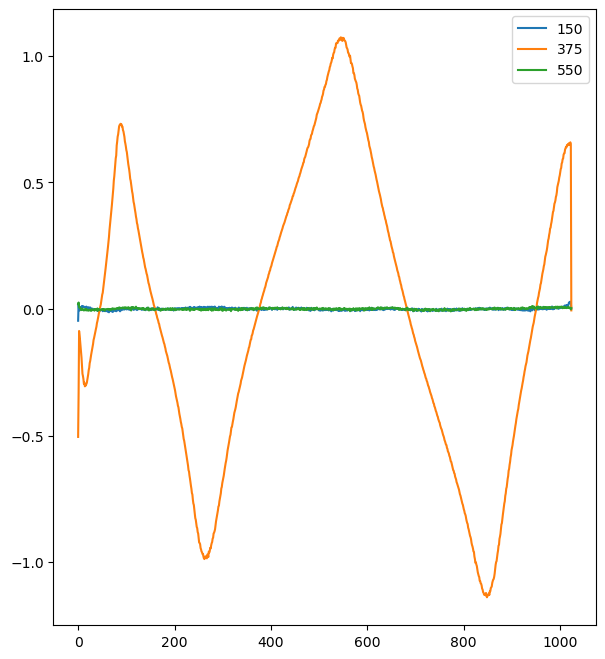

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 8))

plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 374])
plt.plot(sd_hf["transformer.wpe.weight"][:, 550])
plt.legend(["150", "375", "550"])

In [26]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model = 'gpt2', device = 'cuda')
set_seed(42)
generator("Hi. Let me tell you a story about the planet Pluto. Once,", max_length = 75, num_return_sequences = 5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hi. Let me tell you a story about the planet Pluto. Once, for the first time in 150,000 years, it was in an orbit around the Sun, with no gravity at all (this will explain why this year's temperature is around 16 degrees K), and the orbit was so high that it appeared to be on Pluto's surface. It wasn't until the"},
 {'generated_text': "Hi. Let me tell you a story about the planet Pluto. Once, you went to the planet Neptune, and after that happened, you traveled to it and came for more of it! The place I'll call Pluto. It's the closest thing to Earth that we've ever seen. And now, that place is being destroyed by the asteroid strike that destroyed Pluto, and"},
 {'generated_text': "Hi. Let me tell you a story about the planet Pluto. Once, I was a young girl and it was about 4 in the morning. I sat in my bed and just kept going and I could see the stars coming out of Pluto—I couldn't help but giggle. Well, here I am, I'm out on the planet Pluto—I am naked and"},
 {'g